In [1]:
import random as rn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
%matplotlib inline
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

In [2]:
# Mount drive first and proceed
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
X = np.load("/content/drive/MyDrive/data.npy")
labels = np.load("/content/drive/MyDrive/label.npy")

In [13]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

labelEncoder = LabelEncoder()
y = labelEncoder.fit_transform(labels)
y = to_categorical(y, 10)
X=X/255

In [15]:
X[:1]

array([[[[0.11764706, 0.19607843, 0.21568627],
         [0.1254902 , 0.21176471, 0.23137255],
         [0.11764706, 0.21176471, 0.23529412],
         ...,
         [0.20392157, 0.34901961, 0.42745098],
         [0.20784314, 0.34509804, 0.42352941],
         [0.21176471, 0.36862745, 0.44313725]],

        [[0.1254902 , 0.21176471, 0.22352941],
         [0.11764706, 0.21176471, 0.23137255],
         [0.12941176, 0.22745098, 0.24705882],
         ...,
         [0.20392157, 0.33333333, 0.41176471],
         [0.23137255, 0.37254902, 0.44313725],
         [0.23529412, 0.37254902, 0.45098039]],

        [[0.09411765, 0.17647059, 0.18823529],
         [0.11372549, 0.20784314, 0.23137255],
         [0.12941176, 0.22745098, 0.24313725],
         ...,
         [0.23529412, 0.36078431, 0.43529412],
         [0.2627451 , 0.38431373, 0.4627451 ],
         [0.25882353, 0.37647059, 0.45490196]],

        ...,

        [[0.2627451 , 0.24313725, 0.10588235],
         [0.19215686, 0.16078431, 0.01568627]

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score
from sklearn.model_selection import GridSearchCV
import tensorflow as tf

In [17]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

print("x_train shape: ", x_train.shape)
print("x_test shape: ", x_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

x_train shape:  (2503, 150, 150, 3)
x_test shape:  (626, 150, 150, 3)
y_train shape:  (2503, 10)
y_test shape:  (626, 10)


In [28]:
# know neural ntwrk architecture # work in sequential model
from keras import models
from keras import layers
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D,Activation
from keras.optimizers import Adam

In [33]:
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = (150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))


model.add(Conv2D(filters =96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters = 96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(10, activation = "softmax"))

In [34]:
# preprocess
from keras.preprocessing.image import ImageDataGenerator
# data augmentation
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,   # set each sample mean to 0
    featurewise_std_normalization=False,   # divide inputs by std of the dataset
    samplewise_std_normalization= False,   # divide each input by its std
    zca_whitening=False,   # dimesion reduction
    rotation_range=10,    # randomly rotate images in the range 10 degrees
    zoom_range=0.1,      # Randomly zoom image 10%
    width_shift_range=0.2,   # randomly shift images horizontally 20%
    height_shift_range=0.2,   # randomly shift images vertically 20%
    horizontal_flip=True,     # randomly flip images
    vertical_flip=False    # randomly flip images
)
datagen.fit(x_train)

In [35]:
model.compile(optimizer=Adam(learning_rate=0.001), loss="categorical_crossentropy", metrics = ["accuracy"])

In [36]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 150, 150, 32)      2432      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 75, 75, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 37, 37, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 37, 37, 96)        55392     
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 18, 18, 96)      

In [37]:
# Train the model
batch_size = 64
epochs = 80

history = model.fit(
    datagen.flow(x_train, y_train, batch_size=batch_size),
    steps_per_epoch=len(x_train) // batch_size,
    epochs=epochs,
    validation_data=(x_test, y_test))

Epoch 1/80
39/39 [==============================] - 199s 5s/step - loss: 2.0892 - accuracy: 0.2263 - val_loss: 1.8432 - val_accuracy: 0.3131
Epoch 2/80
39/39 [==============================] - 196s 5s/step - loss: 1.7288 - accuracy: 0.3604 - val_loss: 1.5723 - val_accuracy: 0.4201
Epoch 3/80
39/39 [==============================] - 196s 5s/step - loss: 1.5901 - accuracy: 0.4108 - val_loss: 1.4713 - val_accuracy: 0.4617
Epoch 4/80
39/39 [==============================] - 197s 5s/step - loss: 1.5310 - accuracy: 0.4449 - val_loss: 1.3580 - val_accuracy: 0.5160
Epoch 5/80
39/39 [==============================] - 197s 5s/step - loss: 1.4688 - accuracy: 0.4662 - val_loss: 1.3648 - val_accuracy: 0.5607
Epoch 6/80
39/39 [==============================] - 200s 5s/step - loss: 1.3921 - accuracy: 0.4871 - val_loss: 1.3587 - val_accuracy: 0.5351
Epoch 7/80
39/39 [==============================] - 196s 5s/step - loss: 1.3364 - accuracy: 0.5150 - val_loss: 1.2846 - val_accuracy: 0.5575
Epoch 8/80
39

In [38]:
# Evaluate the model using the test data
model_loss, model_accuracy = model.evaluate(x_test,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")


20/20 - 14s - loss: 1.0452 - accuracy: 0.7859 - 14s/epoch - 685ms/step
Loss: 1.0451751947402954, Accuracy: 0.7859424948692322


In [43]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [44]:
model.save('/content/drive/MyDrive/model_78.h5')


In [ ]:
# Save the model
model.save("model/flower-recognition-model-70-epochs-256.h5")

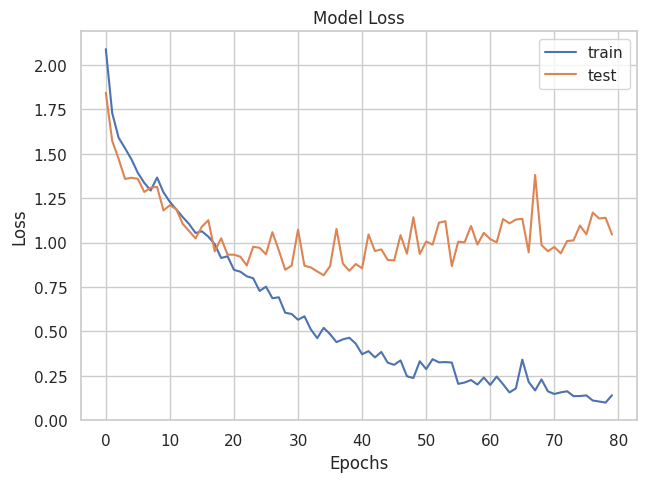

In [45]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

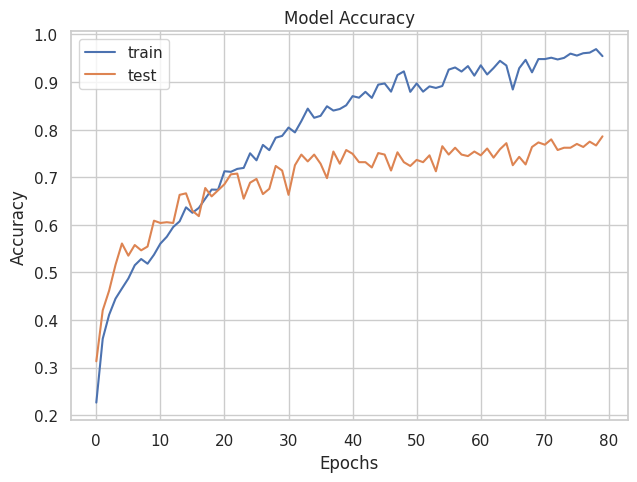

In [46]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

In [47]:
# getting predictions on val set.
pred=model.predict(x_test)
pred_digits=np.argmax(pred, axis=1)

20/20 [==============================] - 11s 510ms/step


In [48]:

# now storing some properly as well as misclassified indexes'.
i=0
prop_class=[]
mis_class=[]

for i in range(len(y_test)):
    if(np.argmax(y_test[i])==pred_digits[i]):
        prop_class.append(i)
    if(len(prop_class)==8):
        break

i=0
for i in range(len(y_test)):
    if(not np.argmax(y_test[i])==pred_digits[i]):
        mis_class.append(i)
    if(len(mis_class)==8):
        break

correct_count = 0
for i in range(len(y_test)):
    if(np.argmax(y_test[i])==pred_digits[i]):
        correct_count+=1

miss_count = 0
for i in range(len(y_test)):
    if(not np.argmax(y_test[i])==pred_digits[i]):
        miss_count+=1

print(f"Correct Predictions: {correct_count}")
print(f"Wrong Predictions: {miss_count}")

Correct Predictions: 492
Wrong Predictions: 134


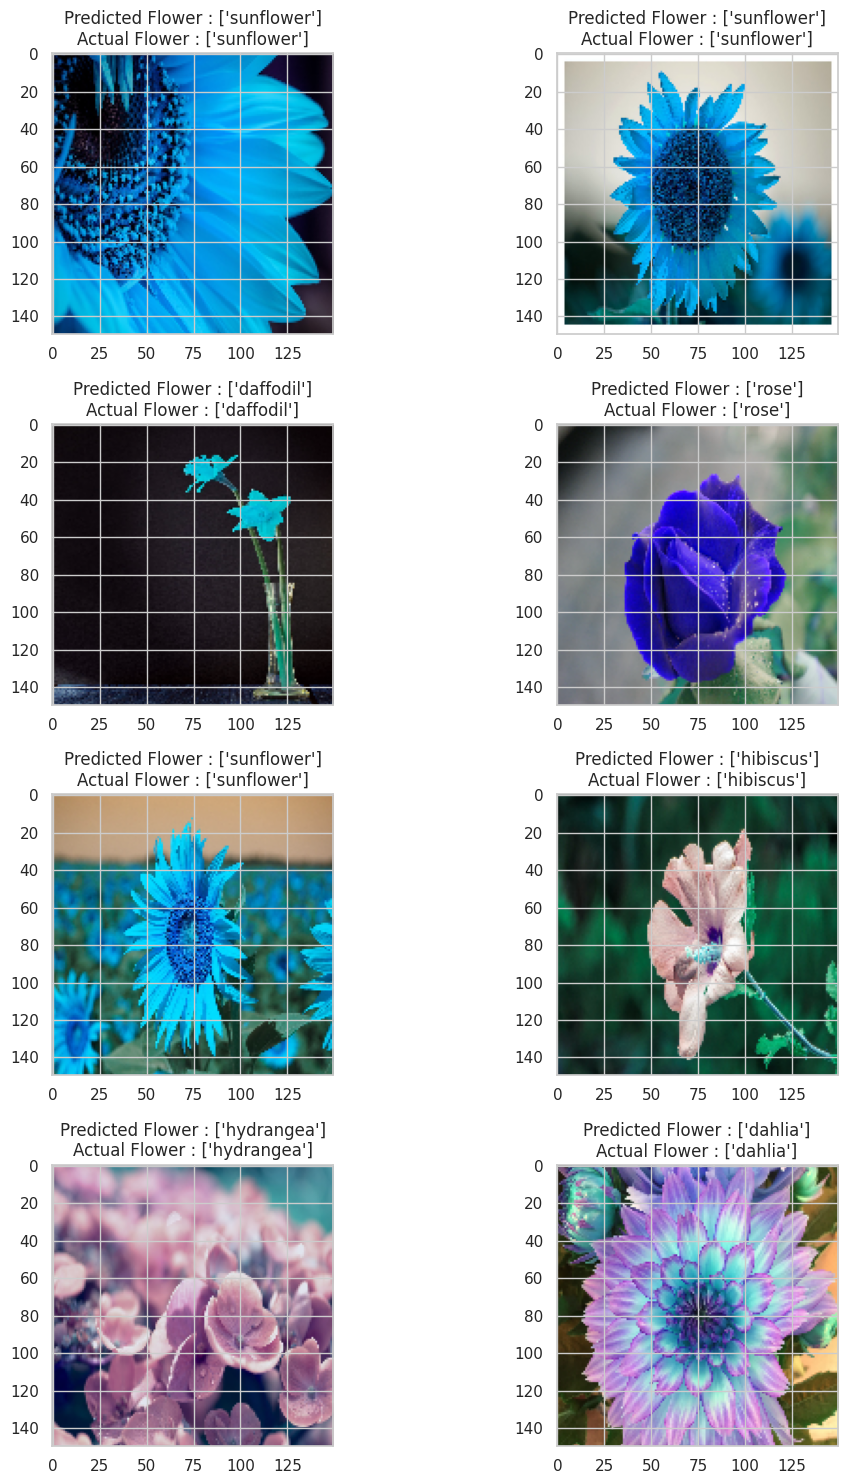

In [49]:
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

warnings.filterwarnings('always')
warnings.filterwarnings('ignore')


count=0
fig,ax=plt.subplots(4,2)
fig.set_size_inches(15,15)
for i in range (4):
    for j in range (2):
        ax[i,j].imshow(x_test[prop_class[count]])
        ax[i,j].set_title("Predicted Flower : "+str(labelEncoder.inverse_transform([pred_digits[prop_class[count]]]))+"\n"+"Actual Flower : "+str(labelEncoder.inverse_transform([np.argmax([y_test[prop_class[count]]])])))
        plt.tight_layout()
        count+=1

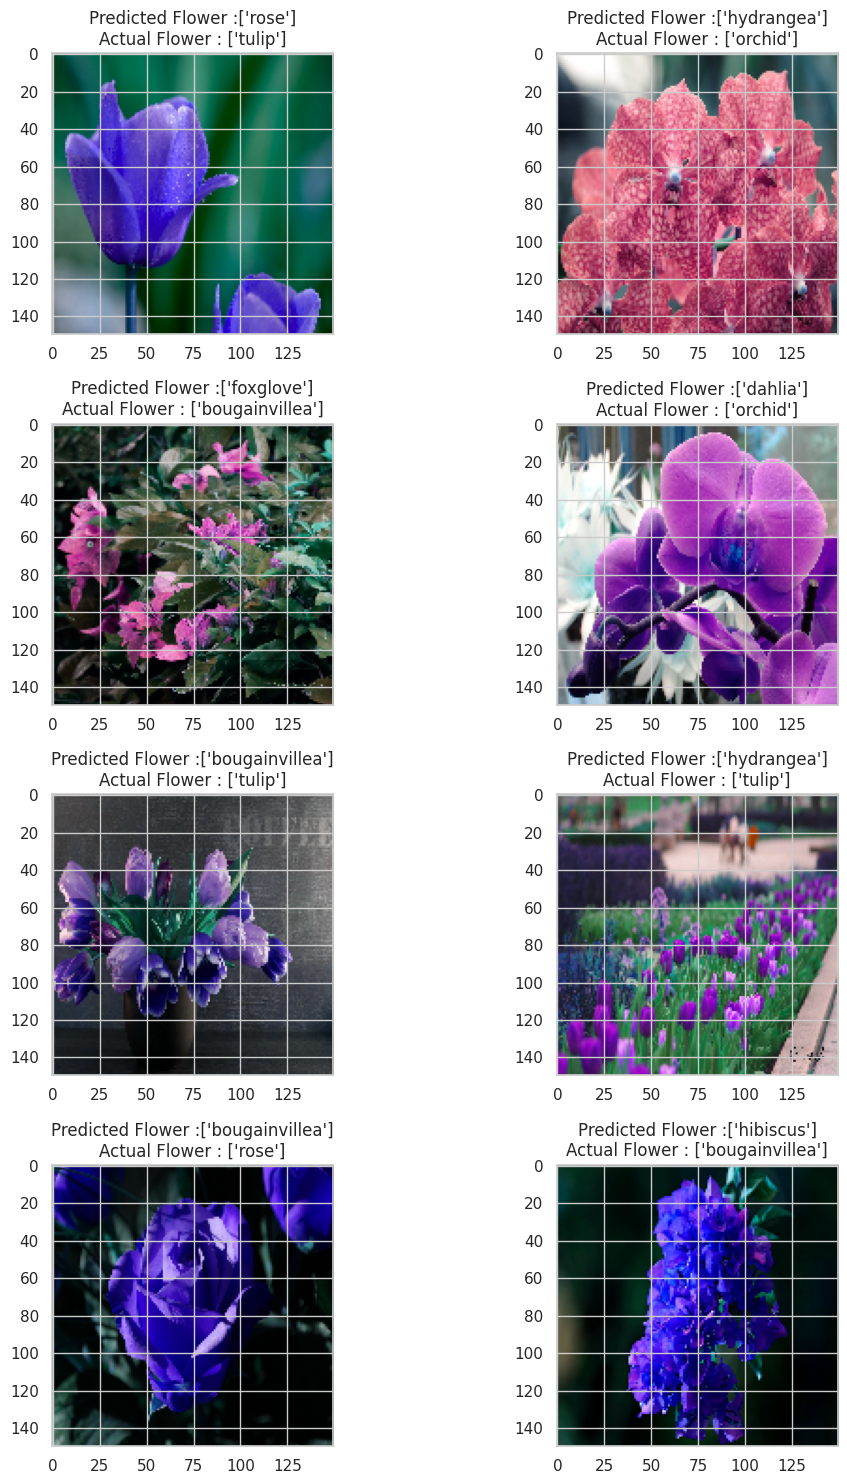

In [50]:
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

count=0
fig,ax=plt.subplots(4,2)
fig.set_size_inches(15,15)
for i in range (4):
    for j in range (2):
        ax[i,j].imshow(x_test[mis_class[count]])
        ax[i,j].set_title("Predicted Flower :"+str(labelEncoder.inverse_transform([pred_digits[mis_class[count]]]))+"\n"+"Actual Flower : "+str(labelEncoder.inverse_transform([np.argmax(y_test[mis_class[count]])])))
        plt.tight_layout()
        count+=1

In [54]:
predictions=model.predict(x_test)

20/20 [==============================] - 12s 540ms/step


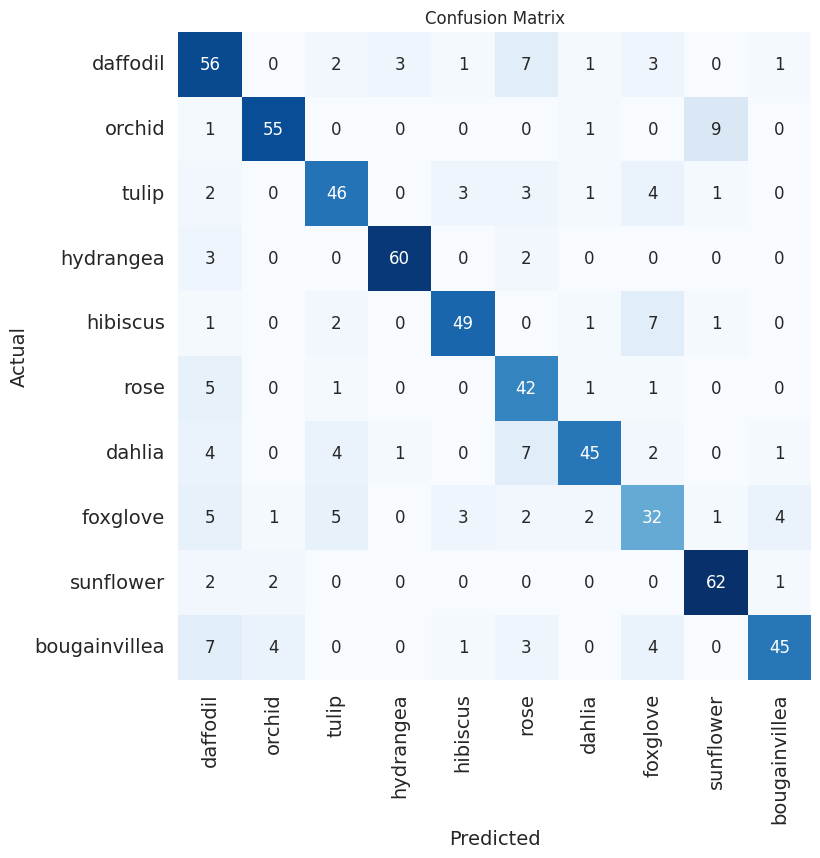

In [56]:
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import accuracy_score, precision_score,confusion_matrix
# Convert one-hot encoded labels to class indices
test_labels_indices = np.argmax(y_test, axis=1)
predictions_indices = np.argmax(pred, axis=1)

# Calculate the confusion matrix
cm = confusion_matrix(test_labels_indices, predictions_indices)

# Get class labels
classes = ['daffodil', 'orchid', 'tulip', 'hydrangea', 'hibiscus', 'rose', 'dahlia', 'foxglove', 'sunflower', 'bougainvillea']
class_count = len(classes)
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)

sns.heatmap(cm, annot=True, vmin=0, fmt='g', cmap='Blues', cbar=False)
plt.xticks(np.arange(class_count) + .5, classes, rotation=90, fontsize=14)
plt.yticks(np.arange(class_count) + .5, classes, rotation=0, fontsize=14)
plt.xlabel("Predicted", fontsize=14)
plt.ylabel("Actual", fontsize=14)
plt.title("Confusion Matrix")

plt.show()

In [57]:
from sklearn.metrics import classification_report
print(classification_report(predictions_indices, test_labels_indices))

              precision    recall  f1-score   support

           0       0.76      0.65      0.70        86
           1       0.83      0.89      0.86        62
           2       0.77      0.77      0.77        60
           3       0.92      0.94      0.93        64
           4       0.80      0.86      0.83        57
           5       0.84      0.64      0.72        66
           6       0.70      0.87      0.78        52
           7       0.58      0.60      0.59        53
           8       0.93      0.84      0.88        74
           9       0.70      0.87      0.78        52

    accuracy                           0.79       626
   macro avg       0.78      0.79      0.78       626
weighted avg       0.79      0.79      0.78       626

